In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# <div align="center">CLASSIFICATION OF SKY OBJECT</div>

*The Kind of this notebook is to find the best model to classify galaxies, stars and quasars from sky observation*<br/>
The data is from Sloan Digital Sky Survey <br/>
First, downloading and first approach of datas:

In [2]:
data = pd.read_csv('Skyserver_data.csv',index_col=0)

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


There is no non_null or nan, but some features seems have correlation, let's see with a correlation matrice, whitch one:

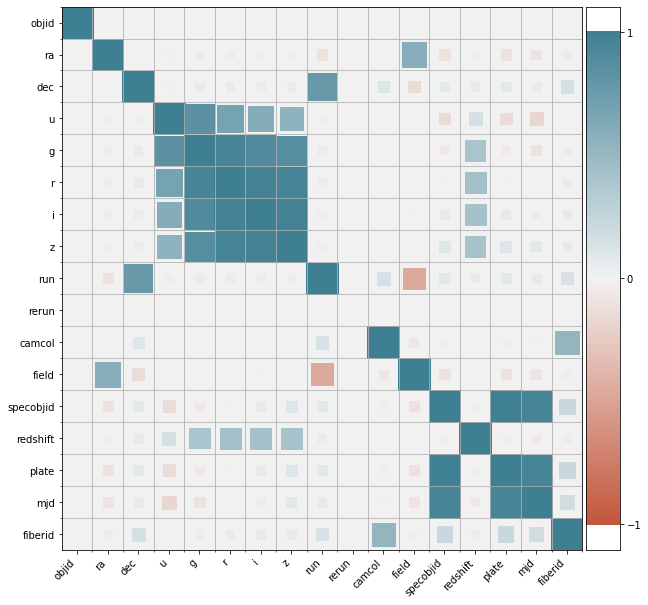

In [6]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(10, 10))
corrplot(data.corr(), size_scale=1000);

We see a lot of correlation with some features : u, g, r, i, z.<br/>
This features are star's magnitude, take from earth in different wave lengh.<br/>
This magnitude taken from earth suffer of biais : <br/>
* distance <br/>
* intrasec brightness <br/>
* extinction with stellar gaz <br/>
<br/>
some column have no relation with target:
* objid<br/>
* rerun<br/>
and some features have too hight correlation between them:<br/>
<br/>
* plate<br/>
* mjd<br/>

**FEATURES ENGINEERING**<br/>
<br/>
We are going to create new feature:<br/>
**[mag_a]** wich is the mean of the different Magnitude<br/>
**[d]** wich is the distance of stellar corpse using the Hubble relation<br/>
**[mag_M]** wich is Magnitude with correction.<br/>
we will remove features with high correlation or useless.<br/>
and we will transform coordonates, too watch the sky with the dataset.

In [7]:
data['d'] = data['redshift'].apply(lambda x : ((x+1)**2)/( (x-1)**2)) 

In [8]:
data['mag_a'] = (data['u']+data['g']+data['r']+data['i']+data['z'])/5
data['var'] = data['d'].apply(lambda x : -5*np.log(x)+5)
data['mag_M'] = data['mag_a']-data['var']
remove = ['u','g','r','i','z','var','rerun','mjd','plate','objid','mag_a']
data_filter = data.copy()
data_filter = data_filter.drop(remove,axis=1)
data_filter['dec_m'] = data_filter['dec'].apply(lambda x: np.cos(x))
data_filter['ra_m'] = data_filter['ra'].apply(lambda x: np.cos(x))

No handles with labels found to put in legend.


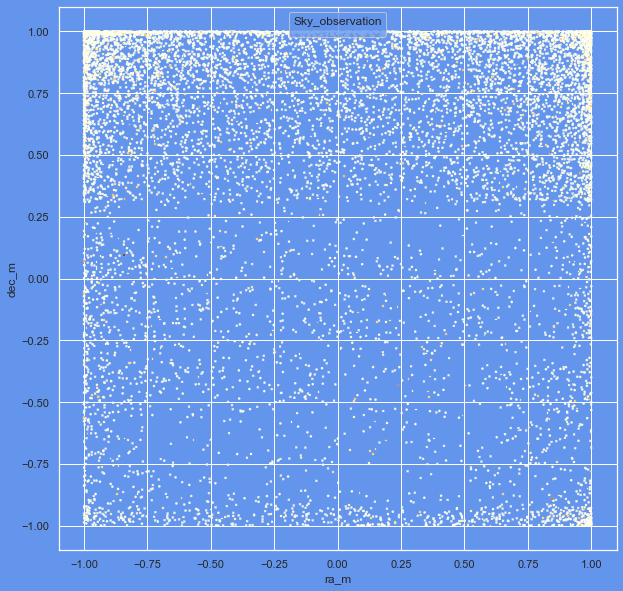

In [9]:
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
plt.figure(figsize=(10,10))
sns.scatterplot(x='ra_m', y='dec_m',data=data_filter, style='class',size = 'mag_M',palette='YlOrBr',hue='redshift',sizes=(5, 10),legend = False)
plt.legend(title='Sky_observation', loc='upper center')

In [10]:
data_filter = data_filter.drop(['dec','ra'],axis=1)

We are going to check the correlation, to see if all the modifications make the dataset more clean

In [11]:
data_filter.corr()

,run,camcol,field,specobjid,redshift,fiberid,d,mag_M,dec_m,ra_m
run,1.000000,0.151814,-0.463898,0.093604,0.059056,0.138566,0.015831,0.075588,-0.603977,0.010488
camcol,0.151814,1.000000,-0.067921,0.040809,0.006834,0.535629,-0.009887,0.005585,0.004396,0.010067
field,-0.463898,-0.067921,1.000000,-0.093724,0.015414,-0.040493,-0.005027,0.002011,0.286540,0.010358
specobjid,0.093604,0.040809,-0.093724,1.000000,-0.038090,0.229837,-0.005422,-0.114530,0.005137,-0.079292
redshift,0.059056,0.006834,0.015414,-0.038090,1.000000,0.046532,0.022177,0.722891,-0.036322,0.007969
fiberid,0.138566,0.535629,-0.040493,0.229837,0.046532,1.000000,-0.006119,0.025345,0.010324,-0.009794
d,0.015831,-0.009887,-0.005027,-0.005422,0.022177,-0.006119,1.000000,0.169176,-0.023202,-0.014022
mag_M,0.075588,0.005585,0.002011,-0.114530,0.722891,0.025345,0.169176,1.000000,-0.038412,-0.006635
dec_m,-0.603977,0.004396,0.286540,0.005137,-0.036322,0.010324,-0.023202,-0.038412,1.000000,-0.023094
ra_m,0.010488,0.010067,0.010358,-0.079292,0.007969,-0.009794,-0.014022,-0.006635,-0.023094,1.000000


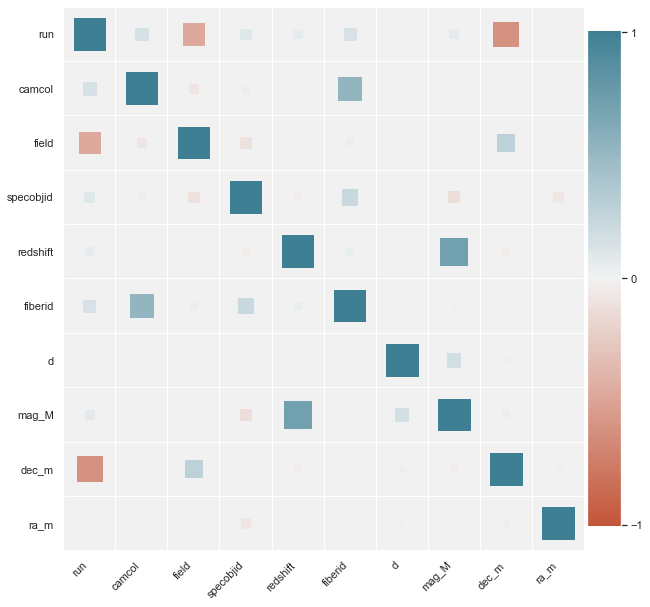

In [12]:
from heatmap import heatmap, corrplot
sns.set(rc={'axes.facecolor':'azure', 'figure.facecolor':'white'})
plt.figure(figsize=(10, 10))
corrplot(data_filter.corr(), size_scale=1000);

The features modification and selection seems good.<br/>
Lets see some graph, and the relation between features and targets

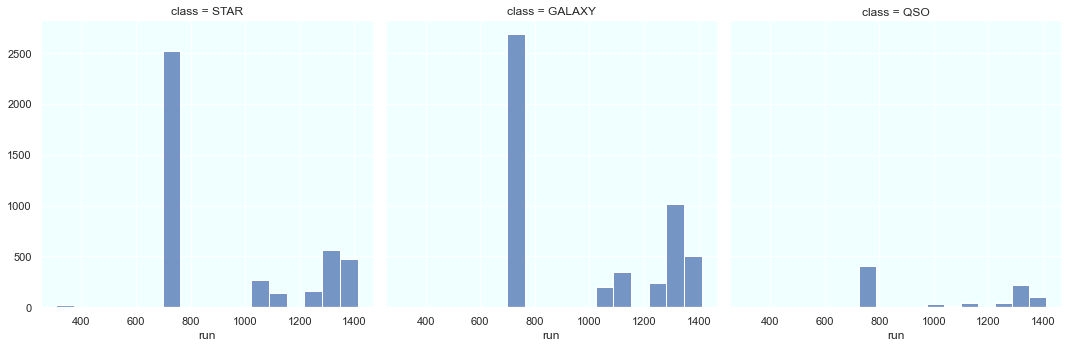

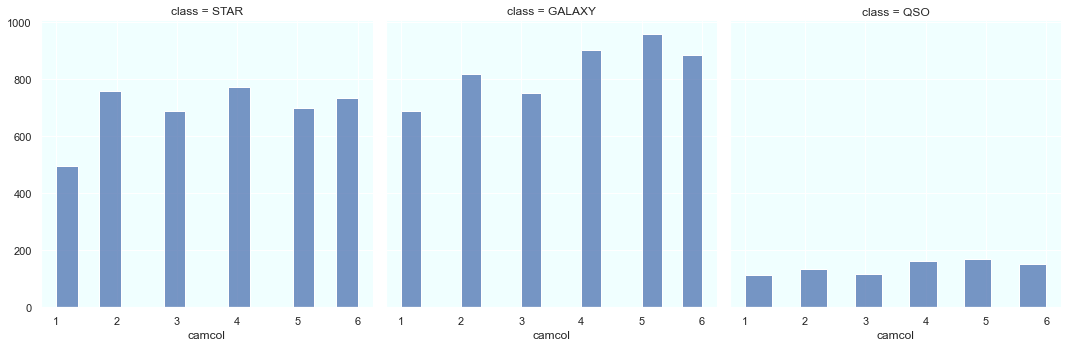

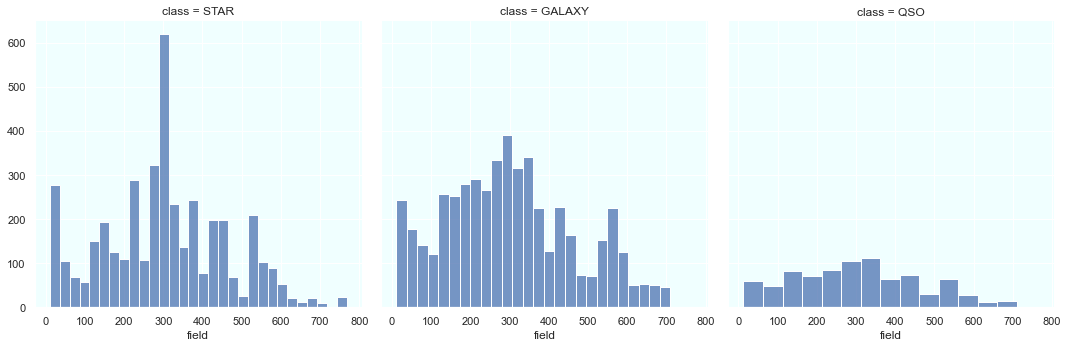

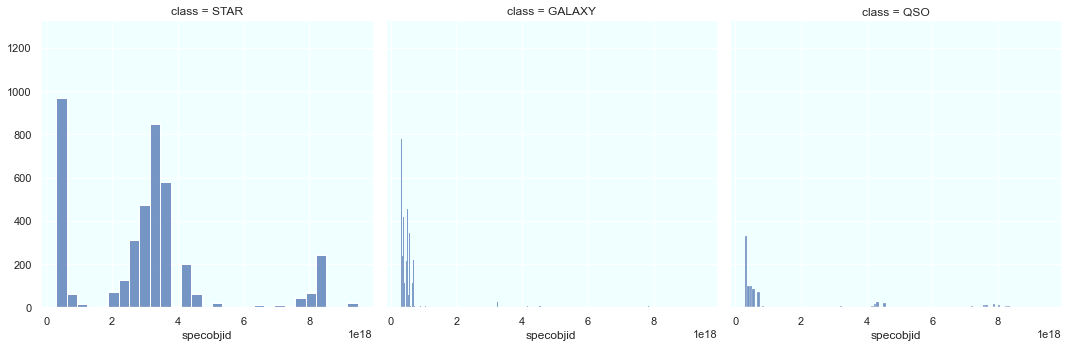

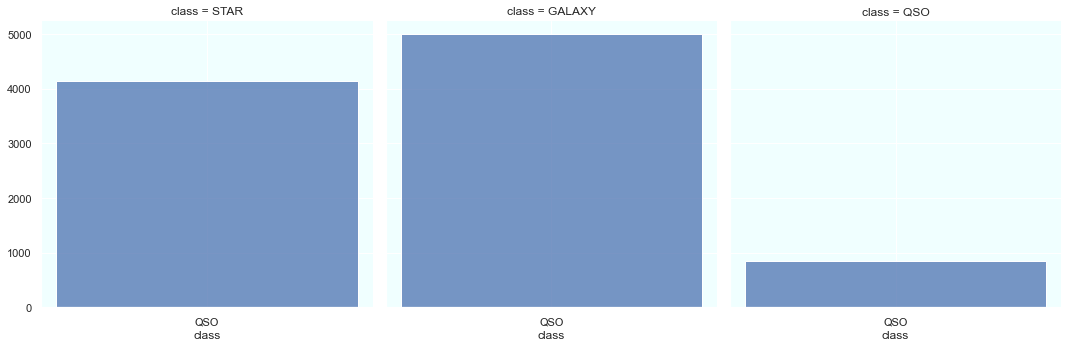

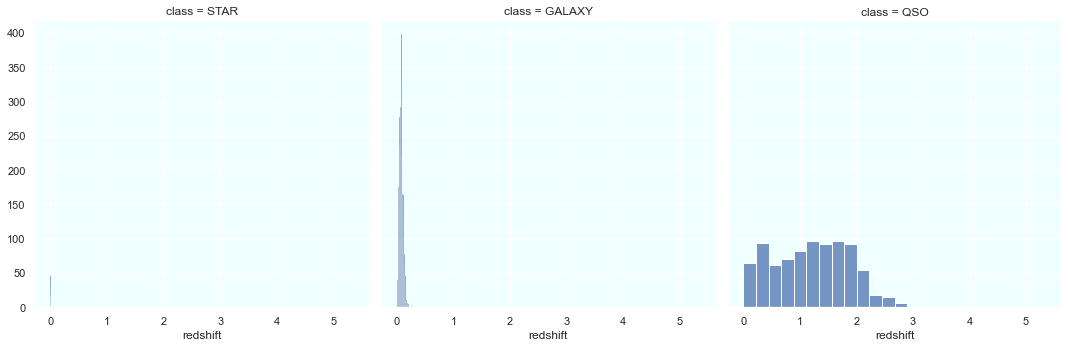

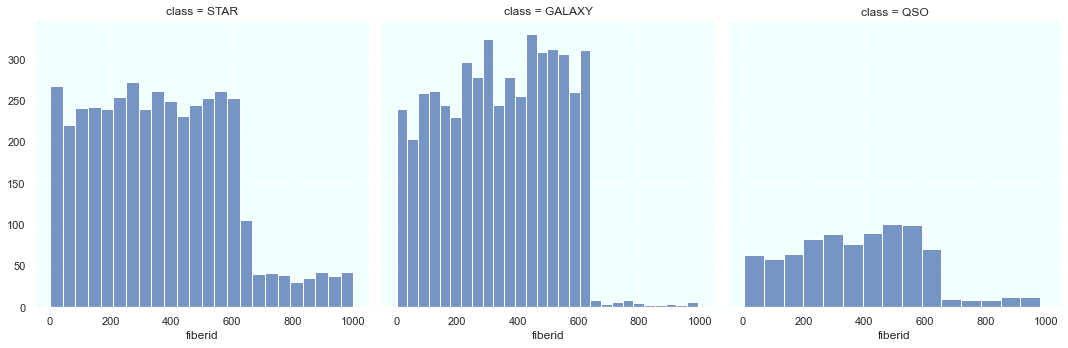

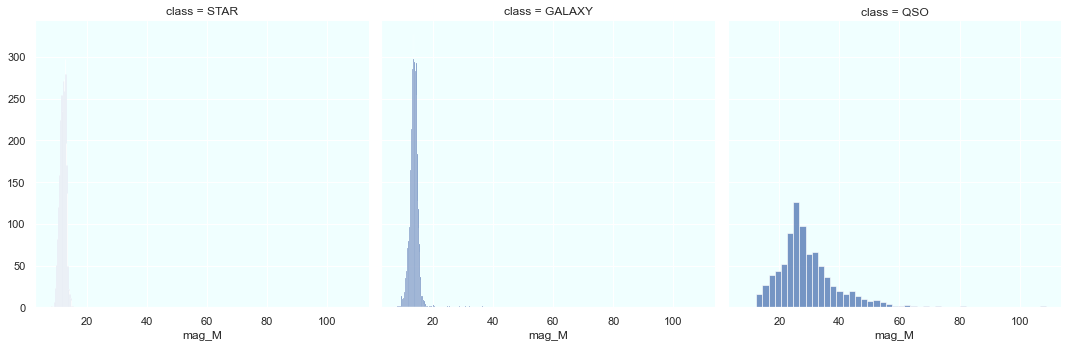

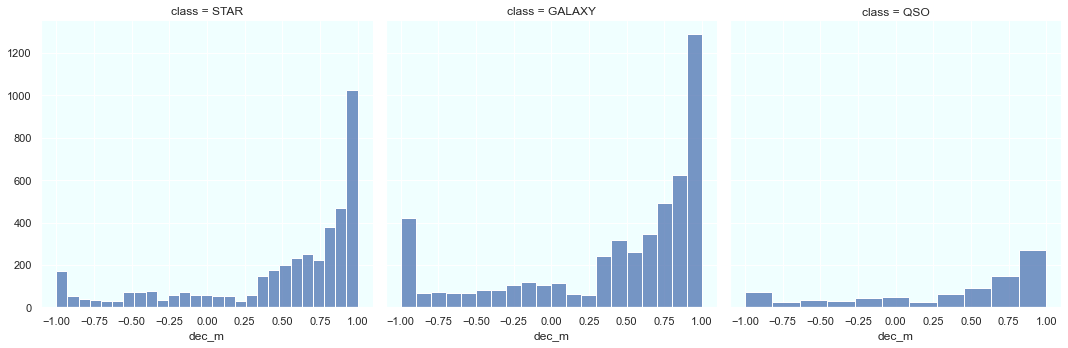

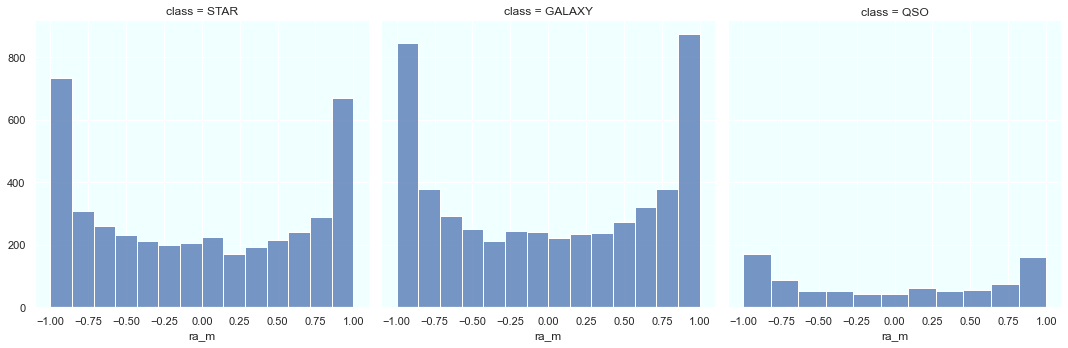

In [13]:
for col in data_filter.drop('d',axis=1).columns:
    g = sns.FacetGrid(data_filter, col="class", height=5, aspect=1)
    g.map(sns.histplot, col)

All the features selected seems intersting to be integreted in a model, <br/>
let's split the datadrame and test some model.

In [14]:
y = data_filter['class']
X = data_filter.drop('class',axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y)

Prepocessing the data:

In [16]:
from sklearn.preprocessing import  StandardScaler, LabelEncoder

sc = StandardScaler()
le = LabelEncoder()

sc.fit_transform(X_train)
sc.transform(X_test)

le.fit(y_train)
le.fit(y_test)


LabelEncoder()

BaseLine model: **Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

C:\Users\froge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print("Accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set : ", accuracy_score(y_test, y_test_pred))

Accuracy on training set :  0.49975
Accuracy on test set :  0.5


The base score of prediction is above 50% lets try to do better with a Decision Tree:

In [19]:
from  sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)


In [20]:
print("Accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy on training set :  1.0
Accuracy on test set :  0.976
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      1000
         QSO       0.88      0.86      0.87       170
        STAR       1.00      1.00      1.00       830

    accuracy                           0.98      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.98      0.98      0.98      2000



The score is better but with overfitting, we are going to try to reduce it with a grid search:

In [21]:
parameters = {'min_samples_split':[2,3,4],
              "min_samples_leaf":[15,20,35],
                 'max_depth':[3.5,4,5.5]}

grid_dt = GridSearchCV(model_dt, parameters)
grid_dt.fit(X_train, y_train)

y_train_pred = grid_dt.best_estimator_.predict(X_train)
y_test_pred = grid_dt.best_estimator_.predict(X_test)

In [22]:
grid_dt.best_params_

{'max_depth': 3.5, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [23]:
print("Accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy on training set :  0.99
Accuracy on test set :  0.991
              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99      1000
         QSO       0.98      0.94      0.96       170
        STAR       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



99% of good prediction with a good f1-score, much better, the gridsearch improve the decision tree and Quasar prediction climb from 8 % . <br/>
Let see the confusion matrix:

<AxesSubplot:>

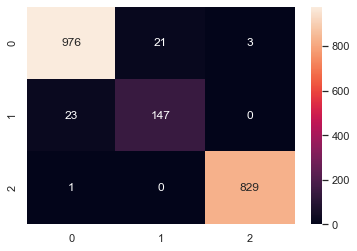

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")

We can see that most of the elements are predicted, most mistake are for Quasar.<br/>
Let's try some boost and see what's happen:

In [25]:
from sklearn.ensemble import AdaBoostClassifier

regressor = AdaBoostClassifier(n_estimators=200)
parameters = {'n_estimators':np.arange(2,10,1),
              "learning_rate":np.arange(1.00,1.60,0.05)}

regressor_ada_best = GridSearchCV(regressor, parameters)
regressor_ada_best.fit(X_train, y_train)


GridSearchCV(estimator=AdaBoostClassifier(n_estimators=200),
             param_grid={'learning_rate': array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 ]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [26]:
regressor_ada_best.best_params_

{'learning_rate': 1.0, 'n_estimators': 3}

In [27]:
y_train_pred = regressor_ada_best.best_estimator_.predict(X_train)
y_test_pred = regressor_ada_best.best_estimator_.predict(X_test)

In [28]:
print("Accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_pred_test))

Accuracy on training set :  0.9855
Accuracy on test set :  0.983
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      1000
         QSO       0.88      0.86      0.87       170
        STAR       1.00      1.00      1.00       830

    accuracy                           0.98      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.98      0.98      0.98      2000



<AxesSubplot:>

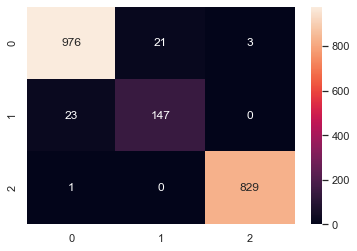

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")

In [30]:
from xgboost import XGBClassifier

In [31]:
classif_xgb = XGBClassifier()
classif_xgb.fit(X_train, y_train)
parameters = {'max_depth':np.arange(0,10,2),
             'num_parallel_tree':np.arange(1,10,1),
             'gamma':np.arange(0,10,2),
             }

regressor_xgb_best = GridSearchCV(classif_xgb, parameters,n_jobs=1,verbose=2)
regressor_xgb_best.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] gamma=0, max_depth=0, num_parallel_tree=1 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=1, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=1 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=1, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=1 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ gamma=0, max_depth=0, num_parallel_tree=1, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=1 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=1, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=1 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=1, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=2 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=2, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=2 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=2, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=2 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=2, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=2 .......................
[CV] ........ gamma=0, max_depth=0, num_parallel_tree=2, total=   0.1s
[CV] gamma=0, max_depth=0, num_parallel_tree=2 .......................
[CV] .

[Parallel(n_jobs=1)]: Done 1125 out of 1125 | elapsed: 36.3min finished


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree

In [32]:
y_train_pred = regressor_xgb_best.best_estimator_.predict(X_train)
y_test_pred = regressor_xgb_best.best_estimator_.predict(X_test)

In [33]:
regressor_xgb_best.best_params_ #'gamma': 2, 'max_depth': 4, 'num_parallel_tree': 1}

{'gamma': 2, 'max_depth': 4, 'num_parallel_tree': 1}

In [34]:
print("Accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("Accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_pred_test))

Accuracy on training set :  0.992375
Accuracy on test set :  0.9905
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      1000
         QSO       0.88      0.86      0.87       170
        STAR       1.00      1.00      1.00       830

    accuracy                           0.98      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.98      0.98      0.98      2000



<AxesSubplot:>

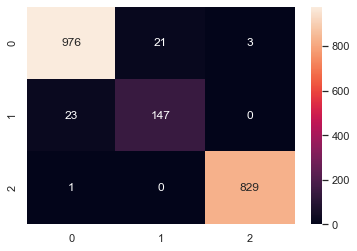

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d")

### CONCLUSION

Globaly we have good result.<br/>
The Higher score is for Decission Tree, who can have the better score on Quasar.<br/>
Finally on the matrix, all the model do the  same mistake.<br/>
The biggest mistakes are for Quasar who are classify as Galaxie, but don't forget than Quasar are Galaxie too, but their core are significantly brithly.

We selected the random forest model, and retrain it on all data with gridsearch parametres:

In [80]:
sc_final = StandardScaler()
le_final = LabelEncoder()

sc_final.fit_transform(X)
le.fit(y)
#{'max_depth': 3.5, 'min_samples_leaf': 15, 'min_samples_split': 2}
model_dt_final = DecisionTreeClassifier(max_depth=3.5,min_samples_leaf=15,min_samples_split=2)
model_dt_final.fit(X,y)
y_pred = model_dt_final.predict(X)

In [81]:
b

Accuracy on Final model:  0.9887
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      4998
         QSO       0.97      0.93      0.95       850
        STAR       0.99      1.00      1.00      4152

    accuracy                           0.99     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

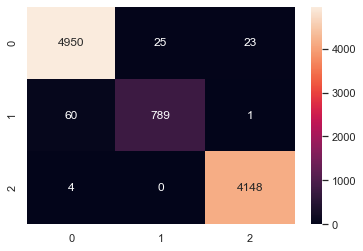

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

##MODEL TEST ON NEW DATASET##

In [113]:
data_test = pd.read_csv('skyserver_test.csv')
data_train = pd.read_csv('skyserver_data.csv',index_col=0 )

We check if the new datas has not been seen by the model before during trainning.

In [104]:
check = list(data_train.objid.values)
data_test.objid.isin(check).sum()

0

We do the same feature engineering and preprocessing:

In [120]:
data_test['d'] = data_test['redshift'].apply(lambda x : ((x+1)**2)/( (x-1)**2)) 
data_test['mag_a'] = (data_test['u']+data_test['g']+data_test['r']+data_test['i']+data_test['z'])/5
data_test['var'] = data_test['d'].apply(lambda x : -5*np.log(x)+5)
data_test['mag_M'] = data_test['mag_a']- data_test['var']
remove = ['u','g','r','i','z','var','rerun','mjd','plate','objid','mag_a']
data_final = data_test.copy()
data_final = data_final.drop(remove,axis=1)
data_final['dec_m'] = data_final['dec'].apply(lambda x: np.cos(x))
data_final['ra_m'] = data_final['ra'].apply(lambda x: np.cos(x))
data_final = data_final.drop(['dec','ra'],axis=1)

In [117]:
data_test.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,specobjid,class,redshift,plate,mjd,fiberid,d,mag_a,var,mag_M
0,1237649742332494038,80.267804,2.614176,17.04017,15.80248,15.32685,15.05350,14.95565,994,301,...,8175301721121071104,QSO,5.393847,7261,56603,518,2.117555,15.635730,1.248690,14.387040
1,1237649742332625383,80.542691,2.681284,19.23289,18.17901,17.46866,17.04593,16.88102,994,301,...,8175328934033858560,QSO,6.992002,7261,56603,617,1.778964,17.761502,2.119843,15.641659
2,1237649742332821751,81.025931,2.453132,16.56457,15.51298,15.07091,14.95203,14.90816,994,301,...,8175357796214087680,QSO,5.654183,7261,56603,722,2.044102,15.401730,1.425207,13.976523
3,1237649742333477500,82.491111,2.048767,19.00733,18.50309,18.48242,18.27020,18.21365,994,301,...,8175433112760590336,QSO,0.449578,7261,56603,996,6.935731,18.495338,-4.683433,23.178771
4,1237649742869562159,80.845472,3.051962,19.51111,17.50066,16.43063,15.93514,15.53812,994,301,...,8175349274998972416,QSO,5.992820,7261,56603,691,1.961611,16.983132,1.631170,15.351962


In [121]:
data_final.isna().sum()

run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
fiberid      0
d            0
mag_M        0
dec_m        0
ra_m         0
dtype: int64

In [122]:
y_final = data_final['class']
X_final = data_final.drop('class',axis=1)
sc = StandardScaler()
le = LabelEncoder()

sc.fit_transform(X_final)
le.fit(y_final)

y_pred_final = model_dt_final.predict(X_final)

In [123]:
print("Accuracy on Final model: ", accuracy_score(y_final, y_pred_final))
print(classification_report(y_final, y_pred_final))

Accuracy on Final model:  0.98694
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99     24259
         QSO       0.97      0.93      0.95      4751
        STAR       0.99      1.00      1.00     20990

    accuracy                           0.99     50000
   macro avg       0.98      0.97      0.98     50000
weighted avg       0.99      0.99      0.99     50000



<AxesSubplot:>

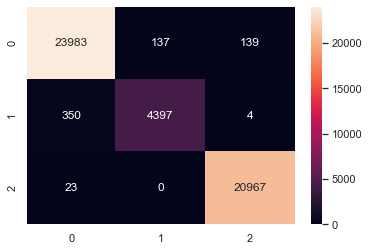

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_final, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d")

The model keep good performance of prediction on unseen data.